In [1]:
from datetime import datetime
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import xarray as xr

from ormhw.core import CURATED_DIR
from ormhw.cuti import import_cuti, import_beuti
from ormhw.transitions import CBR

In [2]:
years = range(2015,2024)
figsize = (6,5)
dpi = 600
filename = 'ooi_ce04'
filetype = 'jpg'
matplotlib.rcParams.update({'font.size': 8})

In [3]:
cuti = import_cuti()
beuti = import_beuti()
cutir = cuti.rolling({'time': 11}, min_periods = 1, center = True).mean()
beutir = beuti.rolling({'time': 11}, min_periods = 1, center = True).mean()

In [4]:
mhws = pd.read_csv('/home/jovyan/data/curated/mhws_ce04.csv')
mhws = mhws[[c for c in mhws.columns if 'Unnamed' not in c]]

In [5]:
ctd = xr.open_dataset('/home/jovyan/data/curated/CE04OSSM_CTD_7m.nc')
ctdr = ctd.rolling({'time': 11}, min_periods = 1, center = True).mean()

In [6]:
chl = xr.open_dataset('/home/jovyan/data/curated/CE04OSSM_FLORT_7m.nc')
chlr = chl.rolling({'time': 11}, min_periods = 1, center = True).mean()
chlclim = chl.groupby('time.dayofyear').mean().rolling({'dayofyear': 11}, min_periods = 1, center = True).mean()

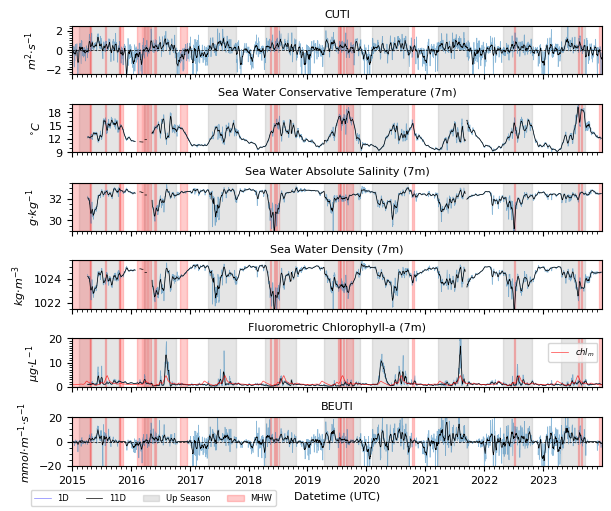

In [7]:
num_plots = 6
fig, ax = plt.subplots(num_plots,1, figsize = figsize, sharex = True, constrained_layout = True)

ax[0].plot(cuti.time, cuti.CUTI, alpha = 0.5,linewidth = 0.5)
ax[0].plot(cutir.time, cutir.CUTI, color = 'black',linewidth = 0.5)
ax[0].axhline(0, color = 'black',linestyle = '--', linewidth = 0.5)
ax[0].set_ylim(-2.5, 2.5)
ax[0].set_ylabel(r'${m^2}{\cdot}{s^{-1}}$')
ax[0].set_title('CUTI', fontsize = 8)
ax[0].yaxis.set_minor_locator(mticker.MultipleLocator(0.25))
ax[0].yaxis.set_major_locator(mticker.MultipleLocator(2))


ax[1].plot(ctd.time, ctd.sea_water_conservative_temperature, alpha = 0.5, linewidth = 0.5)
ax[1].plot(ctdr.time, ctdr.sea_water_conservative_temperature, color = 'black', linewidth = 0.5)
ax[1].set_title('Sea Water Conservative Temperature (7m)', fontsize = 8)
ax[1].set_ylim(9,20)
ax[1].set_ylabel(r'$^{\circ}C$')
ax[1].yaxis.set_minor_locator(mticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(mticker.MultipleLocator(3))


ax[2].plot(ctd.time, ctd.sea_water_absolute_salinity, alpha = 0.5, linewidth = 0.5)
ax[2].plot(ctdr.time, ctdr.sea_water_absolute_salinity, color = 'black', linewidth = 0.5)
ax[2].set_title('Sea Water Absolute Salinity (7m)', fontsize = 8)
ax[2].set_ylabel(r'${g}{\cdot}{kg^{-1}}$')
ax[2].set_ylim(29,33.5)
ax[2].yaxis.set_major_locator(mticker.MultipleLocator(2))
ax[2].yaxis.set_minor_locator(mticker.MultipleLocator(0.5))


ax[3].plot(ctd.time, ctd.sea_water_density, alpha = 0.5, linewidth = 0.5)
ax[3].plot(ctdr.time, ctdr.sea_water_density, color = 'black', linewidth = 0.5)
ax[3].set_title('Sea Water Density (7m)', fontsize = 8)
ax[3].set_ylim(1021.5, 1025.5)
ax[3].set_ylabel(r'${kg}{\cdot}{m^{-3}}$')
ax[3].yaxis.set_major_locator(mticker.MultipleLocator(2))
ax[3].yaxis.set_minor_locator(mticker.MultipleLocator(0.5))



ax[4].plot(chl.time, chl.fluorometric_chlorophyll_a, alpha = 0.5, linewidth = 0.5)
ax[4].plot(chlr.time, chlr.fluorometric_chlorophyll_a, color = 'black', linewidth = 0.5)
for year in years:
    clim = chlclim
    dt = [datetime.strptime(f"{year}-{j}", '%Y-%j') for j in clim.dayofyear.values]
    ax[4].plot(dt, clim.fluorometric_chlorophyll_a, color = 'red', linewidth = 0.5,alpha = 0.75)
ax[4].plot([],[],color = 'red', alpha = 0.75,linewidth = 0.5, label = r'$chl_m$')
ax[4].legend(loc = 'upper right',fontsize = 6)
ax[4].set_title('Fluorometric Chlorophyll-a (7m)', fontsize = 8)
ax[4].set_ylabel(r'${{\mu}g}{\cdot}{L^{-1}}$')
ax[4].set_ylim(0,20)
ax[4].yaxis.set_major_locator(mticker.MultipleLocator(10))
ax[4].yaxis.set_minor_locator(mticker.MultipleLocator(1))

    
ax[5].plot(beuti.time, beuti.BEUTI, alpha = 0.5, linewidth = 0.5)
ax[5].plot(beutir.time, beutir.BEUTI, color = 'black', linewidth = 0.5)
ax[5].set_ylim(-20,20)
ax[5].axhline(0, color = 'black', linestyle = '--',linewidth = 0.5)
ax[5].set_title('BEUTI', fontsize = 8)
ax[5].set_ylabel(r'${mmol}{\cdot}{m^{-1}{\cdot}s^{-1}}$')
ax[5].yaxis.set_major_locator(mticker.MultipleLocator(20))
ax[5].yaxis.set_minor_locator(mticker.MultipleLocator(5))


ax[-1].set_xlim(datetime(2015,1,1), datetime(2023,12,31,23,59,59))

for year in years:
    SF = CBR[year]
    st = datetime.strptime(f"{year}-{SF['spring']}", '%Y-%j')
    ft = datetime.strptime(f"{year}-{SF['fall']}", '%Y-%j')    
    for i in range(num_plots):
        ax[i].axvspan(st,ft, color = 'gray', zorder = 0, alpha = 0.2)
        
for idx,row in mhws.iterrows():
    for i in range(num_plots):
        ax[i].axvspan(row.Ts, row.Te, color = 'red', zorder =1, alpha = 0.2)
        
ax[-1].set_xlabel('Datetime (UTC)')
ax[-1].xaxis.set_minor_locator(mdates.MonthLocator(interval = 1))

ax[-1].plot([],[],color = 'blue', alpha = 0.5,linewidth = 0.5, label = '1D')
ax[-1].plot([],[], color = 'black',linewidth = 0.5, label = '11D')
ax[-1].axvspan(datetime(1999,1,1),datetime(1999,1,2), color = 'gray', zorder = 0, alpha = 0.2,label = 'Up Season')
ax[-1].axvspan(datetime(1999,1,1),datetime(1999,1,2), color = 'red', zorder = 0, alpha = 0.2,label = 'MHW')



_handles, _labels = ax[-1].get_legend_handles_labels()

fig.legend(_handles, _labels,ncol = 4, loc = (0.05,0.01), fontsize = 6)


        
plt.savefig(f'/home/jovyan/oregon-shelf-mhw/figures/{filename}.{filetype}',dpi =dpi)

In [8]:

print('Year','&',r'$\overline{CT}$','&',r'$\overline{SA}$','&',r'$\overline{\rho}$','&',r'$\overline{chl_a}$','&',r'$\overline{CUTI}$','&',r'$\overline{BEUTI}$','\\\\','\hline')

for year in years:
    subctd = ctd.sel(time = slice(datetime(year,7,9), datetime(year,10,8)))
    subchl = chl.sel(time = slice(datetime(year,7,9), datetime(year,10,8)))
    subcuti = cuti.sel(time = slice(datetime(year,7,9), datetime(year,10,8)))
    subbeuti = beuti.sel(time = slice(datetime(year,7,9), datetime(year,10,8)))
    
    _temp = str(np.round(subctd.sea_water_conservative_temperature.mean().values,2)).ljust(5,'0')
    _sal = np.round(subctd.sea_water_absolute_salinity.mean().values,2)
    _dens = str(np.round(subctd.sea_water_density.mean().values,2)).ljust(7,'0')
    _chl = str(np.round(subchl.fluorometric_chlorophyll_a.mean().values,2)).ljust(4,'0')
    
    _cuti = np.round(subcuti.CUTI.mean().values,3)
    _beuti = str(np.round(subbeuti.BEUTI.mean().values,2)).ljust(4,'0')

    print(year, '&', _temp, '&', _sal,'&', _dens,'&', _chl,'&', _cuti,'&', _beuti, '\\\\')

Year & $\overline{CT}$ & $\overline{SA}$ & $\overline{\rho}$ & $\overline{chl_a}$ & $\overline{CUTI}$ & $\overline{BEUTI}$ \\ \hline
2015 & 15.38 & 32.56 & 1023.93 & 1.51 & 0.27 & 1.12 \\
2016 & 14.42 & 32.27 & 1023.91 & 3.47 & 0.398 & 1.88 \\
2017 & 13.60 & 32.64 & 1024.36 & 1.92 & 0.443 & 2.42 \\
2018 & 14.26 & 32.37 & 1024.02 & 1.62 & 0.383 & 2.17 \\
2019 & 16.61 & 32.12 & 1023.32 & 0.88 & 0.214 & 0.96 \\
2020 & 13.16 & 32.55 & 1024.38 & 2.91 & 0.352 & 2.80 \\
2021 & 13.22 & 32.33 & 1024.20 & 4.65 & 0.423 & 4.11 \\
2022 & 14.46 & 31.8 & 1023.55 & 1.69 & 0.305 & 2.90 \\
2023 & 16.48 & 32.36 & 1023.52 & 1.54 & 0.205 & 2.04 \\


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_850/632912231.py:1: SyntaxWarning: invalid escape sequence '\h'
  print('Year','&',r'$\overline{CT}$','&',r'$\overline{SA}$','&',r'$\overline{\rho}$','&',r'$\overline{chl_a}$','&',r'$\overline{CUTI}$','&',r'$\overline{BEUTI}$','\\\\','\hline')
